In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("vacancies.csv")

C:\Users\ostan\AppData\Local\Temp\ipykernel_20624\1145290737.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("vacancies.csv")


In [33]:
df.dropna(subset=['salary_currency'],inplace=True)

In [34]:
df.loc[(df['salary_to'].isnull()), 'salary_to'] = df['salary_from']
df.loc[(df['salary_from'].isnull()), 'salary_from'] = df['salary_to']

In [35]:
df.insert(7, "salary_mean", (df['salary_from'] + df['salary_to']) / 2, True)

In [36]:
df_cur = pd.read_csv("valutes.csv")

In [37]:
def cur_to_rub(time, cur, salary):
    if cur == 'RUR':
        return salary
    if time in df_cur['date'].to_list():
        return salary * df_cur[cur][df_cur['date']== time].iloc[0]
    else: return salary


In [38]:
df.insert(8, "year", df.apply(lambda row: row.published_at.split('-')[0], axis=1), True)

In [39]:
df.insert(9, "year-month", df.apply(lambda row: '-'.join(row.published_at.split('-')[:2]), axis=1), True)

In [40]:
df['salary_mean'] = df.apply(lambda row: cur_to_rub(row['year-month'],
                                                    row['salary_currency'], row['salary_mean']),axis=1)

In [41]:
df = df[df['year-month'] <= '2023-06']

In [42]:
df = df[df.salary_mean <= 5000000]

In [43]:
df_group_area = df.groupby(by="area_name")

In [44]:
areas = df['area_name'].unique()

In [49]:
area_count = len(areas)

In [87]:

percent = len(df)
area_salary = {}
area_count = {}
for area in areas:
    area_count[area] = round(len(df_group_area.get_group(area)) / percent * 100, 2)
    area_salary[area] = df_group_area.get_group(area)['salary_mean'].mean()

In [88]:
count_vacancies = sum(area_count.values())
len_area = list(area_count.keys())

for k in len_area:
        if area_count[k] <= 1 / 100:
            del area_count[k]
            del area_salary[k]

In [83]:
len(area_salary)

281

In [89]:
area_salary = {k: v for k, v in sorted(area_salary.items(), key=lambda kv: (-kv[1], kv[0]))}
year_area_vac_s = {k: area_salary[k] for k in list(area_salary)[:15]}
year_area_vac_s = {k: v for k, v in sorted(year_area_vac_s.items(), key=lambda kv: (-kv[1], kv[0]), reverse=True)}

In [90]:
cities = [x.replace(' ', '\n') if ' ' in x else x for x in list(year_area_vac_s.keys())]
cities = [x.replace('-', '-\n') if '-' in x else x for x in cities]

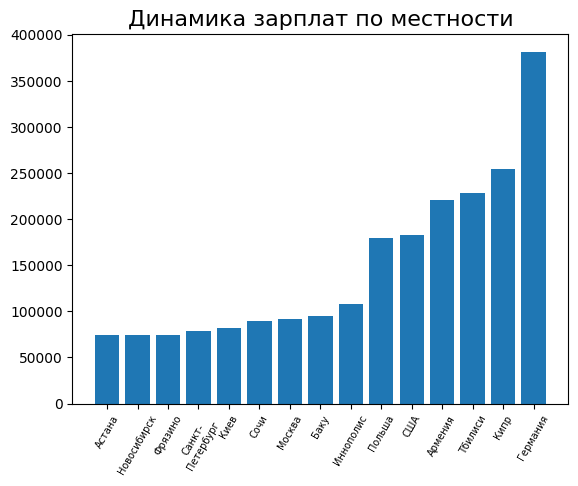

In [93]:
plt.bar(cities,list(year_area_vac_s.values()))
plt.xticks(rotation=60, size=7)
plt.title('Динамика зарплат по местности',size=16)
plt.show()

In [94]:

df_area_salary_to_html = pd.DataFrame(list(year_area_vac_s.items()), columns = ['Местность', 'Средняя ЗП'])

In [95]:
df_area_salary_to_html.to_html('area_salary_all.html')

-----------------vac

In [122]:
df_vac = df[df["name"].str.contains("python|питон|пайтон")]

In [123]:
df_group_area_vac = df_vac.groupby(by="area_name")

In [124]:
areas_vac = df_vac['area_name'].unique()

In [125]:
area_count = len(areas)

In [133]:

percent = len(df_vac)
area_salary_vac = {}
area_count_vac = {}
for area in areas_vac:
    area_count_vac[area] = round(len(df_group_area_vac.get_group(area)) / percent * 100, 2)
    area_salary_vac[area] = df_group_area_vac.get_group(area)['salary_mean'].mean()

In [134]:
count_vacancies = sum(area_count_vac.values())
len_area = list(area_count_vac.keys())

for k in len_area:
        if area_count_vac[k] <= 0.11:
            del area_count_vac[k]
            del area_salary_vac[k]

In [140]:
area_salary_vac['Москва']

144519.22498842594

In [136]:
area_salary = {k: v for k, v in sorted(area_salary_vac.items(), key=lambda kv: (-kv[1], kv[0]))}
year_area_vac_s = {k: area_salary[k] for k in list(area_salary)[:15]}
year_area_vac_s = {k: v for k, v in sorted(year_area_vac_s.items(), key=lambda kv: (-kv[1], kv[0]), reverse=True)}

In [141]:
cities = [x.replace(' ', '\n') if ' ' in x else x for x in list(year_area_vac_s.keys())]
cities = [x.replace('-', '-\n') if '-' in x else x for x in cities]

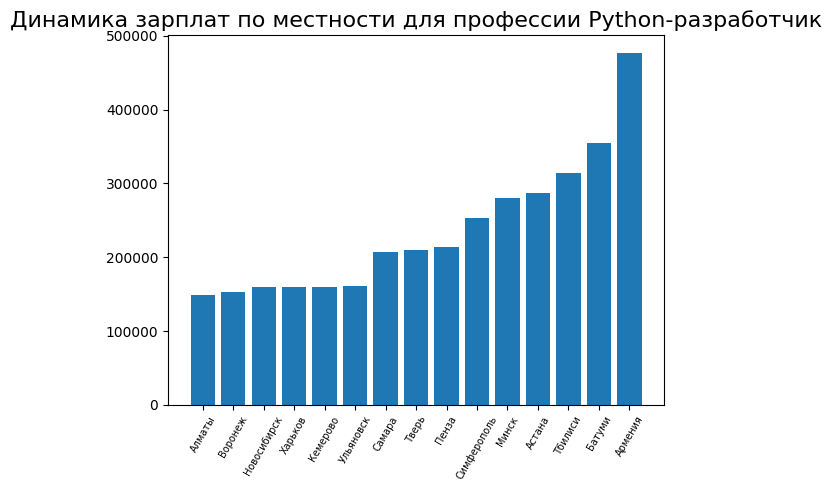

In [143]:
plt.bar(cities,list(year_area_vac_s.values()))
plt.xticks(rotation=60, size=7)
plt.title('Динамика зарплат по местности для профессии Python-разработчик',size=16)
plt.show()

In [144]:
df_area_vac_salary_to_html = pd.DataFrame(list(year_area_vac_s.items()), columns = ['Местность', 'Средняя ЗП'])

In [145]:
df_area_vac_salary_to_html.to_html('area_salary_vac.html')

count----------

In [146]:
df = pd.read_csv("vacancies.csv")

C:\Users\ostan\AppData\Local\Temp\ipykernel_20624\1145290737.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("vacancies.csv")


In [183]:
df_group_area = df.groupby(by="area_name")

In [184]:
areas = df['area_name'].unique()

In [185]:
percent = len(df)

area_count = {}
for area in areas:
    area_count[area] = len(df_group_area.get_group(area))


In [232]:
area_count = {k: v for k, v in sorted(area_count.items(), key=lambda kv: (-kv[1], kv[0]))}
year_area_c = {k: area_count[k] for k in list(area_count)[:15]}
year_area_c = {k: v for k, v in sorted(year_area_c.items(), key=lambda kv: (-kv[1], kv[0]), reverse=True)}

In [233]:
cities = [x.replace(' ', '\n') if ' ' in x else x for x in list(year_area_c.keys())]
cities = [x.replace('-', '-\n') if '-' in x else x for x in cities]

In [234]:
year_area_c.values()

dict_values([57764, 64501, 83108, 85762, 93283, 105241, 124811, 126952, 132234, 138936, 140490, 151775, 231330, 644114, 2108713])

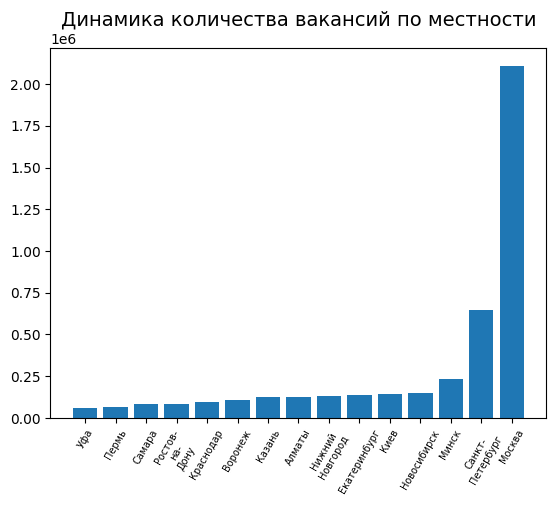

In [238]:
plt.bar(cities,year_area_c.values())
plt.xticks(rotation=60, size=7)
plt.title('Динамика количества вакансий по местности',size=14)
plt.show()

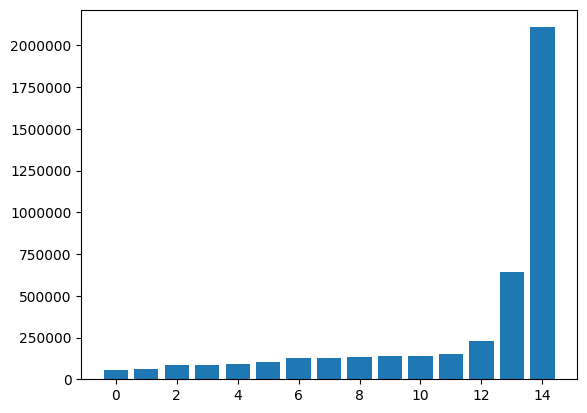

In [247]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter


fig, ax = plt.subplots()
ax.bar([x for x in range(15)],year_area_c.values())
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [210]:
area_data = list(year_area_c.values())
area_data = [len(df) - sum(year_area_c.values())] + area_data
vals = area_data
labels = ['Другие'] + list(year_area_c.keys())

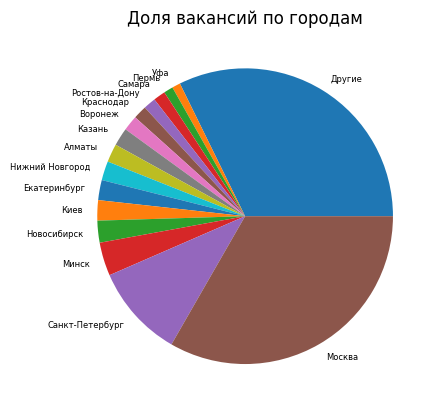

In [211]:
plt.pie(vals, labels=labels, textprops={'fontsize': 6})
plt.title('Доля вакансий по городам')
plt.show()

In [249]:
year_area_c = {k: v for k, v in sorted(year_area_c.items(), key=lambda kv: (-kv[1], kv[0]))}

In [250]:
df_geography_to_html = pd.DataFrame(list(year_area_c.items ()), columns = ['Местность', 'Средняя ЗП'])

In [251]:
df_geography_to_html.to_html('geography_all.html')

count by vac


In [ ]:
df_group_area_vac

In [259]:
areas_vac = df_vac['area_name'].unique()

In [260]:
areas_vac = list(areas_vac)

In [262]:
percent = len(df_vac)

area_count_vac = {}
for area in areas_vac:
    area_count_vac[area] = len(df_group_area_vac.get_group(area))


In [265]:
area_count_vac = {k: v for k, v in sorted(area_count_vac.items(), key=lambda kv: (-kv[1], kv[0]))}
year_area_c_vac = {k: area_count_vac[k] for k in list(area_count_vac)[:14]}
year_area_c_vac = {k: v for k, v in sorted(year_area_c_vac.items(), key=lambda kv: (-kv[1], kv[0]), reverse=True)}

In [266]:
year_area_c_vac

{'Брянск': 9,
 'Волгоград': 10,
 'Минск': 12,
 'Казань': 14,
 'Челябинск': 15,
 'Воронеж': 15,
 'Томск': 16,
 'Ростов-на-Дону': 17,
 'Краснодар': 20,
 'Новосибирск': 27,
 'Екатеринбург': 33,
 'Нижний Новгород': 36,
 'Санкт-Петербург': 132,
 'Москва': 432}

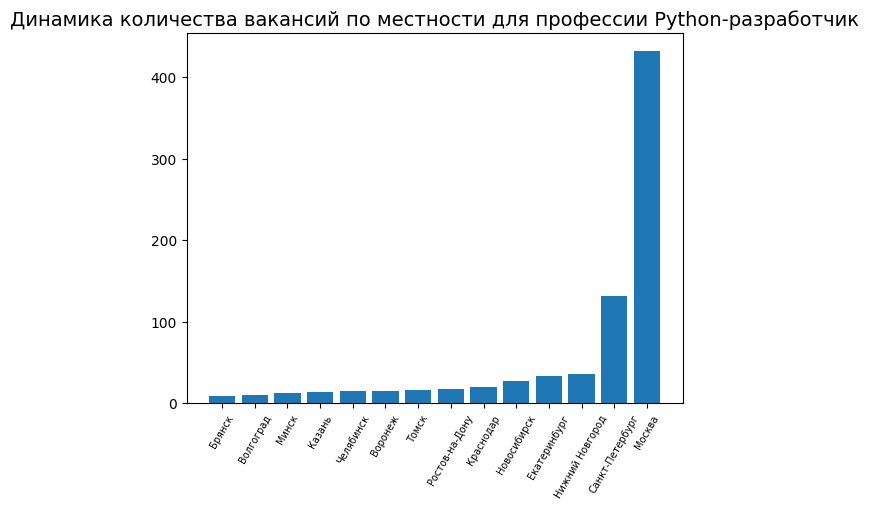

In [267]:
plt.bar(year_area_c_vac.keys(),year_area_c_vac.values())
plt.xticks(rotation=60, size=7)
plt.title('Динамика количества вакансий по местности для профессии Python-разработчик',size=14)
plt.show()

In [274]:
area_data = list(year_area_c_vac.values())
vals = area_data
labels = list(year_area_c_vac.keys())

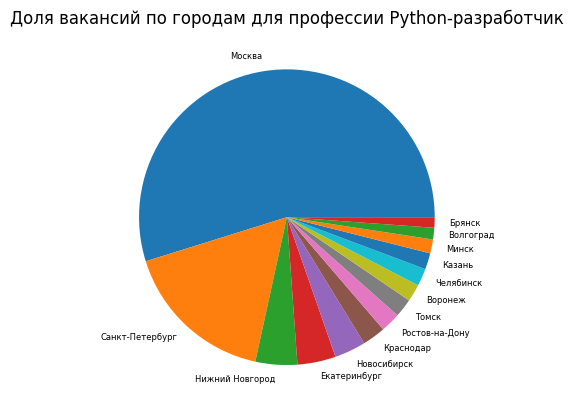

In [276]:
plt.pie(vals, labels=labels, textprops={'fontsize': 6})
plt.title('Доля вакансий по городам для профессии Python-разработчик')
plt.show()

In [268]:
year_area_c_vac = {k: v for k, v in sorted(year_area_c_vac.items(), key=lambda kv: (-kv[1], kv[0]))}
df_ares_c_vac = pd.DataFrame(list(year_area_c_vac.items ()), columns = ['Местность', 'Средняя ЗП'])

In [277]:
df_ares_c_vac.to_html('geography_vac_count.html')